## Setup

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_CSV = '/home/jovyan/data/all_spout_cores_predicted.csv'
OUTPUT = '/home/jovyan/data/export_all_spout_extended.csv'
CSV_DELIMETER = ';'
PATCH_SIZES = [10, 50, 80, 200]

## Load data:

In [3]:
with open(DATA_CSV, newline='') as f:
    reader = csv.reader(f, delimiter=CSV_DELIMETER)
    data = list(reader)

data[0]

['seq',
 'patch_10_preds',
 'patch_10_starts',
 'patch_10_ends',
 'patch_10_min_pos_start',
 'patch_10_min_pos_end',
 'patch_10_min_pred',
 'patch_50_preds',
 'patch_50_starts',
 'patch_50_ends',
 'patch_50_min_pos_start',
 'patch_50_min_pos_end',
 'patch_50_min_pred',
 'patch_80_preds',
 'patch_80_starts',
 'patch_80_ends',
 'patch_80_min_pos_start',
 'patch_80_min_pos_end',
 'patch_80_min_pred',
 'patch_200_preds',
 'patch_200_starts',
 'patch_200_ends',
 'patch_200_min_pos_start',
 'patch_200_min_pos_end',
 'patch_200_min_pred',
 'real_start',
 'real_end',
 'knot_length',
 'family',
 'set']

In [4]:
scores_df = pd.DataFrame(data[1:], columns=data[0])
scores_df

,seq,patch_10_preds,patch_10_starts,patch_10_ends,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_starts,patch_50_ends,...,patch_200_starts,patch_200_ends,patch_200_min_pos_start,patch_200_min_pos_end,patch_200_min_pred,real_start,real_end,knot_length,family,set
0,MVACLVNTYDKLKLHEIHLRTIARAAPLCYAYDFHLALFDFNFWKE...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",113.0,123.0,0.002666898537427187,"[1.0, 0.9999998807907104, 0.9999991655349731, ...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60...",...,[0],[0],0.0,0.0,1.0,90.0,133.0,43,IPR007501,dunno
1,MPARFYIALLHHPVVNRDGEVVTTSITNIDVHDIARSARTYDVDGF...,"[0.9995520710945129, 0.9986887574195862, 0.998...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",143.0,153.0,6.898846095282352e-06,"[0.9995520710945129, 0.03299438953399658, 0.06...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60...",...,[0],[0],0.0,0.0,0.9995520710945129,109.0,157.0,48,IPR019230,test
2,MPLLPRRYERLQAVLNRRMADLTLLLEAVDKPHNLSAILRSCDAVG...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",145.0,155.0,0.9999997615814209,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60...",...,"[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 200, 201, 202, 203, 204, 205, 206, 207, 20...",29.0,229.0,0.10518263280391693,96.0,138.0,42,IPR022724,train
3,MEEIYVVLNNVSSPQRLIDVARVVYAFKSSKVKGFAISKASGMAAQ...,"[0.00012806971790269017, 6.935100373084424e-06...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",38.0,48.0,1.472639718502755e-11,"[0.00012806971790269017, 1.863575294080988e-09...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60...",...,[0],[0],0.0,0.0,0.00012806971790269017,82.0,125.0,43,IPR018665,dunno
4,MRDNIYVGLVHYPVYNKNNVVVATSVTNFDIHDISRTCRTYDIKKY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, ...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",142.0,152.0,4.115283445571549e-06,"[1.0, 0.9999887943267822, 0.9999717473983765, ...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60...",...,[0],[0],0.0,0.0,1.0,109.0,156.0,47,IPR019230,dunno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,EGKRPEIWVTSARASGDVVDATIAGARMREVPSLILFGTGHGLAPA...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",39.0,49.0,2.1270072465995327e-05,"[1.0, 0.9331463575363159, 0.9966157078742981, ...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60...",...,[0],[0],0.0,0.0,1.0,6.0,53.0,47,IPR019230,test
1887,MTPERYRRICETLDRRQPDMTVIMDGVHKPHNIAAIVRTCDAVGIL...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",146.0,156.0,0.9999898672103882,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60...",...,"[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 200, 201, 202, 203, 204, 205, 206, 207, 20...",24.0,224.0,0.04921819269657135,94.0,136.0,42,IPR022724,dunno
1888,MVEVFVVLNNVSSPQRLLDTAKVTYSANMSFVKGFIAVKVTGMAAQ...,"[0.9999995231628418, 0.9999982118606567, 0.999...","[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 10, 11, 12, 13, 14, 15, 1

Fix format (str -> numeric):

In [5]:
for patch_size in PATCH_SIZES:
    scores_df[f'patch_{patch_size}_min_pos_start'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pos_start'])
    scores_df[f'patch_{patch_size}_min_pos_end'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pos_end'])
    scores_df[f'patch_{patch_size}_min_pred'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pred'])
    scores_df[f'patch_{patch_size}_preds'] = scores_df.apply(lambda row: [float(_) for _ in row[f'patch_{patch_size}_preds'].replace('[', '').replace(']', '').split(',')], axis = 1)
    scores_df[f'patch_{patch_size}_starts'] = scores_df.apply(lambda row: [float(_) for _ in row[f'patch_{patch_size}_starts'].replace('[', '').replace(']', '').split(',')], axis = 1)
    scores_df[f'patch_{patch_size}_ends'] = scores_df.apply(lambda row: [float(_) for _ in row[f'patch_{patch_size}_ends'].replace('[', '').replace(']', '').split(',')], axis = 1)
scores_df['real_start'] = pd.to_numeric(scores_df['real_start'])
scores_df['real_end'] = pd.to_numeric(scores_df['real_end'])
scores_df

,seq,patch_10_preds,patch_10_starts,patch_10_ends,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_starts,patch_50_ends,...,patch_200_starts,patch_200_ends,patch_200_min_pos_start,patch_200_min_pos_end,patch_200_min_pred,real_start,real_end,knot_length,family,set
0,MVACLVNTYDKLKLHEIHLRTIARAAPLCYAYDFHLALFDFNFWKE...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",113.0,123.0,2.666899e-03,"[1.0, 0.9999998807907104, 0.9999991655349731, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,[0.0],[0.0],0.0,0.0,1.000000,90.0,133.0,43,IPR007501,dunno
1,MPARFYIALLHHPVVNRDGEVVTTSITNIDVHDIARSARTYDVDGF...,"[0.9995520710945129, 0.9986887574195862, 0.998...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",143.0,153.0,6.898846e-06,"[0.9995520710945129, 0.03299438953399658, 0.06...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,[0.0],[0.0],0.0,0.0,0.999552,109.0,157.0,48,IPR019230,test
2,MPLLPRRYERLQAVLNRRMADLTLLLEAVDKPHNLSAILRSCDAVG...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",145.0,155.0,9.999998e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,"[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0...",29.0,229.0,0.105183,96.0,138.0,42,IPR022724,train
3,MEEIYVVLNNVSSPQRLIDVARVVYAFKSSKVKGFAISKASGMAAQ...,"[0.00012806971790269017, 6.935100373084424e-06...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",38.0,48.0,1.472640e-11,"[0.00012806971790269017, 1.863575294080988e-09...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,[0.0],[0.0],0.0,0.0,0.000128,82.0,125.0,43,IPR018665,dunno
4,MRDNIYVGLVHYPVYNKNNVVVATSVTNFDIHDISRTCRTYDIKKY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",142.0,152.0,4.115283e-06,"[1.0, 0.9999887943267822, 0.9999717473983765, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,[0.0],[0.0],0.0,0.0,1.000000,109.0,156.0,47,IPR019230,dunno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,EGKRPEIWVTSARASGDVVDATIAGARMREVPSLILFGTGHGLAPA...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",39.0,49.0,2.127007e-05,"[1.0, 0.9331463575363159, 0.9966157078742981, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,[0.0],[0.0],0.0,0.0,1.000000,6.0,53.0,47,IPR019230,test
1887,MTPERYRRICETLDRRQPDMTVIMDGVHKPHNIAAIVRTCDAVGIL...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",146.0,156.0,9.999899e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,"[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0...",24.0,224.0,0.049218,94.0,136.0,42,IPR022724,dunno
1888,MVEVFVVLNNVSSPQRLLDTAKVTYSANMSFVKGFIAVKVTGMAAQ...,"[0.9999995231628418, 0.9999982118606567, 0.999...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",109.0,119.0,4.389072e-04,"[0.9999995231628418,

Skip sequences which wouldn't even be predicted as having a knot:

In [7]:
scores_df = scores_df.loc[scores_df['patch_10_preds'].str[0] >= 0.5]
scores_df

,seq,patch_10_preds,patch_10_starts,patch_10_ends,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_starts,patch_50_ends,...,patch_200_starts,patch_200_ends,patch_200_min_pos_start,patch_200_min_pos_end,patch_200_min_pred,real_start,real_end,knot_length,family,set
0,MVACLVNTYDKLKLHEIHLRTIARAAPLCYAYDFHLALFDFNFWKE...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",113.0,123.0,0.002667,"[1.0, 0.9999998807907104, 0.9999991655349731, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,[0.0],[0.0],0.0,0.0,1.000000,90.0,133.0,43,IPR007501,dunno
1,MPARFYIALLHHPVVNRDGEVVTTSITNIDVHDIARSARTYDVDGF...,"[0.9995520710945129, 0.9986887574195862, 0.998...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",143.0,153.0,0.000007,"[0.9995520710945129, 0.03299438953399658, 0.06...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,[0.0],[0.0],0.0,0.0,0.999552,109.0,157.0,48,IPR019230,test
2,MPLLPRRYERLQAVLNRRMADLTLLLEAVDKPHNLSAILRSCDAVG...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",145.0,155.0,1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,"[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0...",29.0,229.0,0.105183,96.0,138.0,42,IPR022724,train
4,MRDNIYVGLVHYPVYNKNNVVVATSVTNFDIHDISRTCRTYDIKKY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",142.0,152.0,0.000004,"[1.0, 0.9999887943267822, 0.9999717473983765, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,[0.0],[0.0],0.0,0.0,1.000000,109.0,156.0,47,IPR019230,dunno
5,MADLTVLLEHVEKPHNLSAILRSCDAVGVLEAHAVNYSGRLPTFNS...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",130.0,140.0,0.994173,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,"[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0...",11.0,211.0,0.453029,78.0,120.0,42,IPR022724,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,EGKRPEIWVTSARASGDVVDATIAGARMREVPSLILFGTGHGLAPA...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",39.0,49.0,0.000021,"[1.0, 0.9331463575363159, 0.9966157078742981, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,[0.0],[0.0],0.0,0.0,1.000000,6.0,53.0,47,IPR019230,test
1887,MTPERYRRICETLDRRQPDMTVIMDGVHKPHNIAAIVRTCDAVGIL...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",146.0,156.0,0.999990,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,"[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0...",24.0,224.0,0.049218,94.0,136.0,42,IPR022724,dunno
1888,MVEVFVVLNNVSSPQRLLDTAKVTYSANMSFVKGFIAVKVTGMAAQ...,"[0.9999995231628418, 0.9999982118606567, 0.999...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0,

## Calculate overlaps of knot core predictions with real knot core intervals:

In [8]:
# https://stackoverflow.com/questions/2953967/built-in-function-for-computing-overlap-in-python

# what percentage of the predicted interval is actually in the knot core: 
def calculate_score_overlap_wrt_predicted(x_start, x_end, y_start, y_end):
    predicted_len = (x_end - x_start) if (x_end - x_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / predicted_len

# what percentage of the actual knot core was found based on the prediction:
def calculate_score_overlap_wrt_real(x_start, x_end, y_start, y_end):
    real_len = (y_end - y_start) if (y_end - y_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / real_len


# https://www.reddit.com/r/datascience/comments/vqtac5/metric_or_measure_of_how_well_two_time_intervals/

# intersection over union:
def calculate_score_overlap(x_start, x_end, y_start, y_end):
    intersection = min(x_end, y_end)-max(x_start, y_start)
    union = max(x_end, y_end) - min(x_start, y_start)
    return intersection/union if union > 0 else 0

In [13]:
for patch_size in PATCH_SIZES: 
    scores_df[f'patch_{patch_size}_min_overlap_pred'] = scores_df.apply(lambda row: calculate_score_overlap_wrt_predicted(row[f'patch_{patch_size}_min_pos_start'],
                                                                                                                          row[f'patch_{patch_size}_min_pos_end'],
                                                                                                                          row['real_start'],
                                                                                                                          row['real_end']), axis=1)
    
    scores_df[f'patch_{patch_size}_min_overlap_real'] = scores_df.apply(lambda row: calculate_score_overlap_wrt_real(row[f'patch_{patch_size}_min_pos_start'],
                                                                                                                     row[f'patch_{patch_size}_min_pos_end'],
                                                                                                                     row['real_start'],
                                                                                                                     row['real_end']), axis=1)
    
    scores_df[f'patch_{patch_size}_overlap'] = scores_df.apply(lambda row: calculate_score_overlap(row[f'patch_{patch_size}_min_pos_start'],
                                                                                                   row[f'patch_{patch_size}_min_pos_end'],
                                                                                                   row['real_start'],
                                                                                                   row['real_end']), axis=1)
    
scores_df

/tmp/ipykernel_82/1675793139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df[f'patch_{patch_size}_min_overlap_pred'] = scores_df.apply(lambda row: calculate_score_overlap_wrt_predicted(row[f'patch_{patch_size}_min_pos_start'],
/tmp/ipykernel_82/1675793139.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df[f'patch_{patch_size}_min_overlap_real'] = scores_df.apply(lambda row: calculate_score_overlap_wrt_real(row[f'patch_{patch_size}_min_pos_start'],
/tmp/ipykernel_82/1675793139.py:12:

,seq,patch_10_preds,patch_10_starts,patch_10_ends,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_starts,patch_50_ends,...,patch_10_overlap,patch_50_min_overlap_pred,patch_50_min_overlap_real,patch_50_overlap,patch_80_min_overlap_pred,patch_80_min_overlap_real,patch_80_overlap,patch_200_min_overlap_pred,patch_200_min_overlap_real,patch_200_overlap
0,MVACLVNTYDKLKLHEIHLRTIARAAPLCYAYDFHLALFDFNFWKE...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",113.0,123.0,0.002667,"[1.0, 0.9999998807907104, 0.9999991655349731, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.232558,0.44,0.511628,0.309859,0.5375,1.000000,0.537500,0.00,0.0,-0.676692
1,MPARFYIALLHHPVVNRDGEVVTTSITNIDVHDIARSARTYDVDGF...,"[0.9995520710945129, 0.9986887574195862, 0.998...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",143.0,153.0,0.000007,"[0.9995520710945129, 0.03299438953399658, 0.06...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.208333,0.94,0.979167,0.921569,0.6000,1.000000,0.600000,0.00,0.0,-0.694268
2,MPLLPRRYERLQAVLNRRMADLTLLLEAVDKPHNLSAILRSCDAVG...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",145.0,155.0,1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,-0.118644,0.66,0.785714,0.559322,0.5250,1.000000,0.525000,0.21,1.0,0.210000
4,MRDNIYVGLVHYPVYNKNNVVVATSVTNFDIHDISRTCRTYDIKKY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",142.0,152.0,0.000004,"[1.0, 0.9999887943267822, 0.9999717473983765, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.212766,0.84,0.893617,0.763636,0.4250,0.723404,0.365591,0.00,0.0,-0.698718
5,MADLTVLLEHVEKPHNLSAILRSCDAVGVLEAHAVNYSGRLPTFNS...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",130.0,140.0,0.994173,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,-0.161290,0.70,0.833333,0.614035,0.5250,1.000000,0.525000,0.21,1.0,0.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,EGKRPEIWVTSARASGDVVDATIAGARMREVPSLILFGTGHGLAPA...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",39.0,49.0,0.000021,"[1.0, 0.9331463575363159, 0.9966157078742981, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.212766,0.24,0.255319,0.141176,0.5125,0.872340,0.476744,0.00,0.0,-0.113208
1887,MTPERYRRICETLDRRQPDMTVIMDGVHKPHNIAAIVRTCDAVGIL...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",146.0,156.0,0.999990,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,-0.161290,0.60,0.714286,0.483871,0.5250,1.000000,0.525000,0.21,1.0,0.210000
1888,MVEVFVVLNNVSSPQRLLDTAKVTYSANMSFVKGFIAVKVTGMAAQ...,"[0.9999995231628418, 0.9999982118606567, 0.999...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",109.0,119.0,0.000439,"[0.9999995231628418, 0.996144294

In [15]:
scores_df = scores_df.loc[scores_df['patch_10_min_pred'] < 0.5]

## Extend intervals:

In [ ]:
PRED_THRESHOLD = 0.5
MINIMUM_N = 5
MIN_EXTEND_THRESHOLD = 0.2

# take all continuous intervals that result in prediction under some constant
def take_continuous_intervals(preds, starts, ends, threshold=PRED_THRESHOLD):
    intervals = []
    
    current_interval = (0, 0)
    save = False
    for i in range(len(preds)):
        if preds[i] < threshold:
            # make the interval bigger to the right
            if starts[i] <= current_interval[1] and save:
                current_interval = (current_interval[0], ends[i])
            else:
                # start creating new interval
                current_interval = (starts[i], ends[i])
            save = True
        else:
            if save:
                intervals.append(current_interval)
            current_interval = (starts[i], ends[i])
            save = False
            
        # save the interval in case we are at the end of the list
        if save and i == len(preds)-1:
            intervals.append(current_interval)
    
    return intervals


# take N minimum intervals
def take_n_minimums(preds, starts, ends, n=MINIMUM_N):
    intervals = []

    indices = sorted(range(len(preds)), key = lambda sub: preds[sub])[:n]

    for i in range(len(indices)):
        index = indices[i]
        intervals.append((starts[index], ends[index]))
    
    return intervals


# take all continuous intervals that result in prediction under some constant
# TODO: add average prediction score calculation?
def extend_min_interval(preds, starts, ends, min_pred, min_pred_start, min_pred_end):
    min_pred_start = int(min_pred_start)
    min_pred_end = int(min_pred_end)
    
    min_interval = (min_pred_start, min_pred_end)
    threshold = min_pred + MIN_EXTEND_THRESHOLD
    
    for i in range(min_pred_start, len(preds)):
        if preds[i] <= threshold:
            min_interval = (min_interval[0], ends[i])
        else:
            break
            
    for i in range(min_pred_start, 0, -1):
        if preds[i] <= threshold:
            min_interval = (starts[i], min_interval[1])
        else:
            break
    
    return min_interval

In [ ]:
test_preds = [0.9, 0.9, 0.9, 0.9, 0.6, 0.4, 0.3, 0.6, 0.3, 0.2, 0.11, 0.15, 0.1, 0.15, 0.15, 0.4, 0.9, 0.1, 0.2]
test_starts = [0] + [_ for _ in range(len(test_preds))]
test_ends = [0] + [_+10 for _ in range(len(test_preds))]

In [ ]:
list(zip(test_preds, test_starts, test_ends))

[(0.9, 0, 0),
 (0.9, 0, 10),
 (0.9, 1, 11),
 (0.9, 2, 12),
 (0.6, 3, 13),
 (0.4, 4, 14),
 (0.3, 5, 15),
 (0.6, 6, 16),
 (0.3, 7, 17),
 (0.2, 8, 18),
 (0.11, 9, 19),
 (0.15, 10, 20),
 (0.1, 11, 21),
 (0.15, 12, 22),
 (0.15, 13, 23),
 (0.4, 14, 24),
 (0.9, 15, 25),
 (0.1, 16, 26),
 (0.2, 17, 27)]

In [ ]:
take_continuous_intervals(test_preds, test_starts, test_ends)

[(4, 15), (7, 24), (16, 27)]

In [ ]:
take_n_minimums(test_preds, test_starts, test_ends)

[(11, 21), (16, 26), (9, 19), (10, 20), (12, 22)]

In [ ]:
extend_min_interval(test_preds, test_starts, test_ends, min(test_preds), test_starts[np.argmin(test_preds)], test_ends[np.argmin(test_preds)])

(7, 23)

In [ ]:
for patch_size in PATCH_SIZES: 
    scores_df[f'patch_{patch_size}_continuous_intervals'] = scores_df.apply(lambda row: take_continuous_intervals(row[f'patch_{patch_size}_preds'], row[f'patch_{patch_size}_starts'], row[f'patch_{patch_size}_ends']), axis=1)
    scores_df[f'patch_{patch_size}_{MINIMUM_N}_minimum_intervals'] = scores_df.apply(lambda row: take_n_minimums(row[f'patch_{patch_size}_preds'], row[f'patch_{patch_size}_starts'], row[f'patch_{patch_size}_ends']), axis=1)
    scores_df[f'patch_{patch_size}_min_extended'] = scores_df.apply(lambda row: extend_min_interval(row[f'patch_{patch_size}_preds'], row[f'patch_{patch_size}_starts'], row[f'patch_{patch_size}_ends'], row[f'patch_{patch_size}_min_pred'], row[f'patch_{patch_size}_min_pos_start'], row[f'patch_{patch_size}_min_pos_end']), axis=1)
scores_df

,seq,patch_10_preds,patch_10_starts,patch_10_ends,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_starts,patch_50_ends,...,patch_10_min_extended,patch_50_continuous_intervals,patch_50_5_minimum_intervals,patch_50_min_extended,patch_80_continuous_intervals,patch_80_5_minimum_intervals,patch_80_min_extended,patch_200_continuous_intervals,patch_200_5_minimum_intervals,patch_200_min_extended
0,MVACLVNTYDKLKLHEIHLRTIARAAPLCYAYDFHLALFDFNFWKE...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",113.0,123.0,2.666899e-03,"[1.0, 0.9999998807907104, 0.9999991655349731, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,"(106.0, 126.0)","[(58.0, 134.0), (91.0, 147.0), (99.0, 150.0), ...","[(62.0, 112.0), (63.0, 113.0), (72.0, 122.0), ...","(58.0, 133.0)","[(28.0, 147.0), (69.0, 155.0), (77.0, 158.0), ...","[(53.0, 133.0), (52.0, 132.0), (51.0, 131.0), ...","(28.0, 147.0)",[],"[(0.0, 0.0)]","(0, 0.0)"
1,MPARFYIALLHHPVVNRDGEVVTTSITNIDVHDIARSARTYDVDGF...,"[0.9995520710945129, 0.9986887574195862, 0.998...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",143.0,153.0,6.898846e-06,"[0.9995520710945129, 0.03299438953399658, 0.06...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,"(118.0, 160.0)","[(0.0, 66.0), (21.0, 79.0), (82.0, 189.0)]","[(106.0, 156.0), (110.0, 160.0), (109.0, 159.0...","(93.0, 189.0)","[(56.0, 139.0), (79.0, 171.0), (93.0, 189.0)]","[(106.0, 186.0), (109.0, 189.0), (105.0, 185.0...","(96.0, 189.0)",[],"[(0.0, 0.0)]","(0, 0.0)"
4,MRDNIYVGLVHYPVYNKNNVVVATSVTNFDIHDISRTCRTYDIKKY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",142.0,152.0,4.115283e-06,"[1.0, 0.9999887943267822, 0.9999717473983765, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,"(130.0, 154.0)","[(90.0, 187.0)]","[(101.0, 151.0), (102.0, 152.0), (113.0, 163.0...","(90.0, 173.0)","[(60.0, 145.0), (67.0, 156.0), (79.0, 159.0), ...","[(63.0, 143.0), (72.0, 152.0), (101.0, 181.0),...","(62.0, 145.0)",[],"[(0.0, 0.0)]","(0, 0.0)"
12,MVGLYIALLHFPMRNREGQVVVTALTSLDVPDIARTARTYNVKRFY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",33.0,43.0,9.808177e-02,"[1.0, 0.999516487121582, 0.9997422099113464, 0...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,"(33, 43)","[(25.0, 77.0), (85.0, 135.0)]","[(26.0, 76.0), (25.0, 75.0), (85.0, 135.0), (2...","(25.0, 77.0)",[],"[(27.0, 107.0), (83.0, 163.0), (26.0, 106.0), ...","(25.0, 108.0)",[],"[(0.0, 0.0)]","(0, 0.0)"
13,MSNLYLGLVHYPVYNKFGDIVTTSITNLDVHDIARSCRTFGIKKYF...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",25.0,35.0,4.773462e-01,"[1.0, 0.9422417879104614, 0.8721277713775635, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,"(25, 35)","[(108.0, 161.0), (132.0, 186.0)]","[(109.0, 159.0), (110.0, 160.0), (108.0, 158.0...","(108.0, 160.0)","[(108.0, 190.0)]","[(109.0, 189.0), (108.0, 188.0), (110.0, 190.0...","(108.0, 190.0)",[],"[(0.0, 0.0)]","(0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,MHYPVMNKNGDVIASAVTNLDLHDISRAAKTYGVRSFYVVTPLADQ...,"[0.9999994039535522, 0.9999947547912598, 0.999...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",134.0,144.0,4.012221e-07,"[0.9999994039535522, 0.99904

In [ ]:
for patch_size in PATCH_SIZES: 
    scores_df[f'patch_{patch_size}_min_extended_overlap_pred'] = scores_df.apply(lambda row: calculate_score_overlap_wrt_predicted(row[f'patch_{patch_size}_min_extended'][0],
                                                                                                                          row[f'patch_{patch_size}_min_extended'][1],
                                                                                                                          row['real_start'],
                                                                                                                          row['real_end']), axis=1)
    
    scores_df[f'patch_{patch_size}_min_extended_overlap_real'] = scores_df.apply(lambda row: calculate_score_overlap_wrt_real(row[f'patch_{patch_size}_min_extended'][0],
                                                                                                                     row[f'patch_{patch_size}_min_extended'][1],
                                                                                                                     row['real_start'],
                                                                                                                     row['real_end']), axis=1)
    
    scores_df[f'patch_{patch_size}_extended_overlap'] = scores_df.apply(lambda row: calculate_score_overlap(row[f'patch_{patch_size}_min_extended'][0],
                                                                                                   row[f'patch_{patch_size}_min_extended'][1],
                                                                                                   row['real_start'],
                                                                                                   row['real_end']), axis=1)

In [ ]:
scores_df

,seq,patch_10_preds,patch_10_starts,patch_10_ends,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_starts,patch_50_ends,...,patch_10_extended_overlap,patch_50_min_extended_overlap_pred,patch_50_min_extended_overlap_real,patch_50_extended_overlap,patch_80_min_extended_overlap_pred,patch_80_min_extended_overlap_real,patch_80_extended_overlap,patch_200_min_extended_overlap_pred,patch_200_min_extended_overlap_real,patch_200_extended_overlap
0,MVACLVNTYDKLKLHEIHLRTIARAAPLCYAYDFHLALFDFNFWKE...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",113.0,123.0,2.666899e-03,"[1.0, 0.9999998807907104, 0.9999991655349731, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.465116,0.573333,1.000000,0.573333,0.361345,1.000000,0.361345,0.0,0.0,-0.676692
1,MPARFYIALLHHPVVNRDGEVVTTSITNIDVHDIARSARTYDVDGF...,"[0.9995520710945129, 0.9986887574195862, 0.998...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",143.0,153.0,6.898846e-06,"[0.9995520710945129, 0.03299438953399658, 0.06...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.764706,0.500000,1.000000,0.500000,0.516129,1.000000,0.516129,0.0,0.0,-0.694268
4,MRDNIYVGLVHYPVYNKNNVVVATSVTNFDIHDISRTCRTYDIKKY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",142.0,152.0,4.115283e-06,"[1.0, 0.9999887943267822, 0.9999717473983765, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.510638,0.566265,1.000000,0.566265,0.433735,0.765957,0.382979,0.0,0.0,-0.698718
12,MVGLYIALLHFPMRNREGQVVVTALTSLDVPDIARTARTYNVKRFY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",33.0,43.0,9.808177e-02,"[1.0, 0.999516487121582, 0.9997422099113464, 0...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,-0.516667,0.000000,0.000000,-0.218750,0.036145,0.062500,0.023438,0.0,0.0,-0.686275
13,MSNLYLGLVHYPVYNKFGDIVTTSITNLDVHDIARSCRTFGIKKYF...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",25.0,35.0,4.773462e-01,"[1.0, 0.9422417879104614, 0.8721277713775635, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,-0.571429,0.826923,0.977273,0.811321,0.524390,0.977273,0.518072,0.0,0.0,-0.708609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,MHYPVMNKNGDVIASAVTNLDLHDISRAAKTYGVRSFYVVTPLADQ...,"[0.9999994039535522, 0.9999947547912598, 0.999...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",134.0,144.0,4.012221e-07,"[0.9999994039535522, 0.9990401864051819, 0.995...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.531915,0.450000,0.574468,0.337500,0.450549,0.872340,0.422680,0.0,0.0,-0.680272
1881,MSEFDNVYVVLHNVHAVSKVIDTAQVVYGLGFKNFVISKPEGTAAQ...,"[0.9999871253967285, 0.9997794032096863, 0.999...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",61.0,71.0,1.090063e-03,"[0.9999871253967285, 0.0013252230128273368, 0....","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,-0.159420,0.145833,0.291667,0.107692,0.280702,0.666667,0.246154,0.0,0.0,-0.630769
1884,MRPRVAVVVHDVSSAQRLIDMAKLVYGLGFTHLVATKVYGAAASSG...,"[0.9999971389770508, 0.999922513961792, 0.9999...","[0

## Summarize results:

Three types of overlap are calculated: 

1. with respect to predicted lengths,
2. w.r.t. to real length,
3. intersection over union (attempts at joining the two previous ones into one score).

Ideal outcome would be if both 1., 2. overlaps were high (=> intervals are almost identital).

If both are 0, there is no overlap. 

If w.r.t. pred is high and w.r.t. real is low, it means that the chosen patch size was too small. 

### All:

In [23]:
for patch_size in PATCH_SIZES: 
    print(f'Overall results for patch size ==== {patch_size} ====')
    
    print('-- w.r.t. predicted length:')
    pred_mean = scores_df[f'patch_{patch_size}_min_extended_overlap_pred'].mean()
    print(f'Mean: {pred_mean}')
    pred_med = scores_df[f'patch_{patch_size}_min_extended_overlap_pred'].median()
    print(f'Med: {pred_med}')
    pred_max = scores_df[f'patch_{patch_size}_min_extended_overlap_pred'].max()
    print(f'Max: {pred_max}')
    pred_min = scores_df[f'patch_{patch_size}_min_extended_overlap_pred'].min()
    print(f'Min: {pred_min}')
    
    print('\n-- w.r.t. real length:')
    real_mean = scores_df[f'patch_{patch_size}_min_extended_overlap_real'].mean()
    print(f'Mean: {real_mean}')
    real_med = scores_df[f'patch_{patch_size}_min_extended_overlap_real'].median()
    print(f'Med: {real_med}')
    real_max = scores_df[f'patch_{patch_size}_min_extended_overlap_real'].max()
    print(f'Max: {real_max}')
    real_min = scores_df[f'patch_{patch_size}_min_extended_overlap_real'].min()
    print(f'Min: {real_min}')
    
    print('\n-- intersection over union:')
    real_mean = scores_df[f'patch_{patch_size}_extended_overlap'].mean()
    print(f'Mean: {real_mean}')
    real_med = scores_df[f'patch_{patch_size}_extended_overlap'].median()
    print(f'Med: {real_med}')
    real_max = scores_df[f'patch_{patch_size}_extended_overlap'].max()
    print(f'Max: {real_max}')
    real_min = scores_df[f'patch_{patch_size}_extended_overlap'].min()
    print(f'Min: {real_min}')
    
    print('----------------------------------------\n')

Overall results for patch size ==== 10 ====
-- w.r.t. predicted length:
Mean: 0.6862496413530083
Med: 1.0
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.3123306709250127
Med: 0.2765957446808511
Max: 1.0
Min: 0.0

-- intersection over union:
Mean: 0.22310555035852725
Med: 0.2708333333333333
Max: 0.9743589743589743
Min: -0.672316384180791
----------------------------------------

Overall results for patch size ==== 50 ====
-- w.r.t. predicted length:
Mean: 0.45217602023021963
Med: 0.4879360465116279
Max: 0.9420289855072463
Min: 0.0

-- w.r.t. real length:
Mean: 0.7287471372362373
Med: 0.9130023640661938
Max: 1.0
Min: 0.0

-- intersection over union:
Mean: 0.3854060292810959
Med: 0.4537037037037037
Max: 0.9090909090909091
Min: -0.5513307984790875
----------------------------------------

Overall results for patch size ==== 80 ====
-- w.r.t. predicted length:
Mean: 0.3569115082221798
Med: 0.3875
Max: 0.6893203883495146
Min: 0.0

-- w.r.t. real length:
Mean: 0.7942670996316382
Med: 1.0
M

For how many of these there is a reasonably big overlap:

In [24]:
PRED_THRESHOLD = 0.8
REAL_THRESHOLD = 0.8
BOTH_THRESHOLD = 0.2

def get_simple_results_positive(df):
    simple_results = []

    for patch_size in PATCH_SIZES: 
        sequences_count = df.shape[0]
        reasonable_wrt_pred_count = df.loc[df[f'patch_{patch_size}_min_extended_overlap_pred'] >= PRED_THRESHOLD].shape[0]
        reasonable_wrt_real_count = df.loc[df[f'patch_{patch_size}_min_extended_overlap_real'] >= REAL_THRESHOLD].shape[0]
        reasonable_wrt_count = df.loc[df[f'patch_{patch_size}_extended_overlap'] > PRED_THRESHOLD].shape[0]

        simple_results.append({'patch': patch_size,
                               'count w.r.t. pred': reasonable_wrt_pred_count,
                               'percentage w.r.t. pred': reasonable_wrt_pred_count/sequences_count,
                               'count w.r.t. real': reasonable_wrt_real_count,
                               'percentage w.r.t. real': reasonable_wrt_real_count/sequences_count,
                               'count w.r.t. intersection': reasonable_wrt_count,
                               'percentage w.r.t. intersection': reasonable_wrt_count/sequences_count})

    return pd.DataFrame(simple_results)

get_simple_results_positive(scores_df)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,545,0.669533,34,0.041769,20,0.024570
1,50,49,0.060197,480,0.589681,35,0.042998
2,80,0,0.000000,562,0.690418,0,0.000000
3,200,0,0.000000,173,0.212531,0,0.000000


For how many of these there is NOT a reasonably big overlap:

In [25]:
def get_simple_results_negative(df):
    simple_results = []

    for patch_size in PATCH_SIZES: 
        sequences_count = df.shape[0]
        reasonable_wrt_pred_count = df.loc[df[f'patch_{patch_size}_min_extended_overlap_pred'] < 0.1].shape[0]
        reasonable_wrt_real_count = df.loc[df[f'patch_{patch_size}_min_extended_overlap_real'] < 0.1].shape[0]
        reasonable_wrt_count = df.loc[df[f'patch_{patch_size}_extended_overlap'] < 0.0].shape[0]

        simple_results.append({'patch': patch_size,
                               'count w.r.t. pred': reasonable_wrt_pred_count,
                               'percentage w.r.t. pred': reasonable_wrt_pred_count/sequences_count,
                               'count w.r.t. real': reasonable_wrt_real_count,
                               'percentage w.r.t. real': reasonable_wrt_real_count/sequences_count,
                               'count w.r.t. intersection': reasonable_wrt_count,
                               'percentage w.r.t. intersection': reasonable_wrt_count/sequences_count})

    return pd.DataFrame(simple_results)

get_simple_results_negative(scores_df)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,238,0.292383,239,0.293612,228,0.280098
1,50,115,0.141278,113,0.138821,106,0.130221
2,80,104,0.127764,94,0.115479,84,0.103194
3,200,637,0.782555,634,0.778870,633,0.777641


### Look at newly created (extended) patch sizes:

In [26]:
for patch_size in PATCH_SIZES: 
    scores_df[f'patch_{patch_size}_extended_size'] = scores_df.apply(lambda row: (row[f'patch_{patch_size}_min_extended'][1] - row[f'patch_{patch_size}_min_extended'][0]), axis=1)
scores_df

,seq,patch_10_preds,patch_10_starts,patch_10_ends,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_starts,patch_50_ends,...,patch_80_min_extended_overlap_pred,patch_80_min_extended_overlap_real,patch_80_extended_overlap,patch_200_min_extended_overlap_pred,patch_200_min_extended_overlap_real,patch_200_extended_overlap,patch_10_extended_size,patch_50_extended_size,patch_80_extended_size,patch_200_extended_size
0,MVACLVNTYDKLKLHEIHLRTIARAAPLCYAYDFHLALFDFNFWKE...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",113.0,123.0,2.666899e-03,"[1.0, 0.9999998807907104, 0.9999991655349731, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.361345,1.000000,0.361345,0.0,0.0,-0.676692,20.0,75.0,119.0,0.0
1,MPARFYIALLHHPVVNRDGEVVTTSITNIDVHDIARSARTYDVDGF...,"[0.9995520710945129, 0.9986887574195862, 0.998...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",143.0,153.0,6.898846e-06,"[0.9995520710945129, 0.03299438953399658, 0.06...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.516129,1.000000,0.516129,0.0,0.0,-0.694268,42.0,96.0,93.0,0.0
4,MRDNIYVGLVHYPVYNKNNVVVATSVTNFDIHDISRTCRTYDIKKY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",142.0,152.0,4.115283e-06,"[1.0, 0.9999887943267822, 0.9999717473983765, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.433735,0.765957,0.382979,0.0,0.0,-0.698718,24.0,83.0,83.0,0.0
12,MVGLYIALLHFPMRNREGQVVVTALTSLDVPDIARTARTYNVKRFY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",33.0,43.0,9.808177e-02,"[1.0, 0.999516487121582, 0.9997422099113464, 0...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.036145,0.062500,0.023438,0.0,0.0,-0.686275,10.0,52.0,83.0,0.0
13,MSNLYLGLVHYPVYNKFGDIVTTSITNLDVHDIARSCRTFGIKKYF...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",25.0,35.0,4.773462e-01,"[1.0, 0.9422417879104614, 0.8721277713775635, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.524390,0.977273,0.518072,0.0,0.0,-0.708609,10.0,52.0,82.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,MHYPVMNKNGDVIASAVTNLDLHDISRAAKTYGVRSFYVVTPLADQ...,"[0.9999994039535522, 0.9999947547912598, 0.999...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",134.0,144.0,4.012221e-07,"[0.9999994039535522, 0.9990401864051819, 0.995...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.450549,0.872340,0.422680,0.0,0.0,-0.680272,25.0,60.0,91.0,0.0
1881,MSEFDNVYVVLHNVHAVSKVIDTAQVVYGLGFKNFVISKPEGTAAQ...,"[0.9999871253967285, 0.9997794032096863, 0.999...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",61.0,71.0,1.090063e-03,"[0.9999871253967285, 0.0013252230128273368, 0....","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0...",...,0.280702,0.666667,0.246154,0.0,0.0,-0.630769,10.0,96.0,114.0,0.0
1884,MRPRVAVVVHDVSSAQRLIDMAKLVYGLGFTHLVATKVYGAAASSG...,"[0.9999971389770508, 0.999922513961792, 0.9999...","[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",65.0,75.0,1.788745e-05,"[0.9999971389770508, 0.03

In [27]:
import matplotlib.pyplot as plt

def plot_df(plt_size_x, plt_size_y, df, column_name, y_scale):
    plt.rcParams['figure.figsize'] = (plt_size_x, plt_size_y)
    ax = df.plot(x='index', y=column_name, kind='bar', rot=90)  # rot to rotate x-axis data point description
    plt.ylim([0, y_scale])  # force y-axis scale to be the same as it is for the other graph
    plt.show()
    

def plot_column_value_count_distribution(df, column_name):
    df_lengths = df[column_name].value_counts().to_frame()
    df_lengths['index'] = df_lengths.index
    df_lengths = df_lengths.sort_values('index')
    df_lengths = df_lengths.reset_index(drop=True)
    
    middle_index = len(df_lengths) // 2
    
    y_scale = df_lengths.max()[column_name] + 5
    
    plot_df(30, 3, df_lengths.head(middle_index), column_name, y_scale)
    plot_df(30, 3, df_lengths.tail(len(df_lengths) - middle_index), column_name, y_scale)

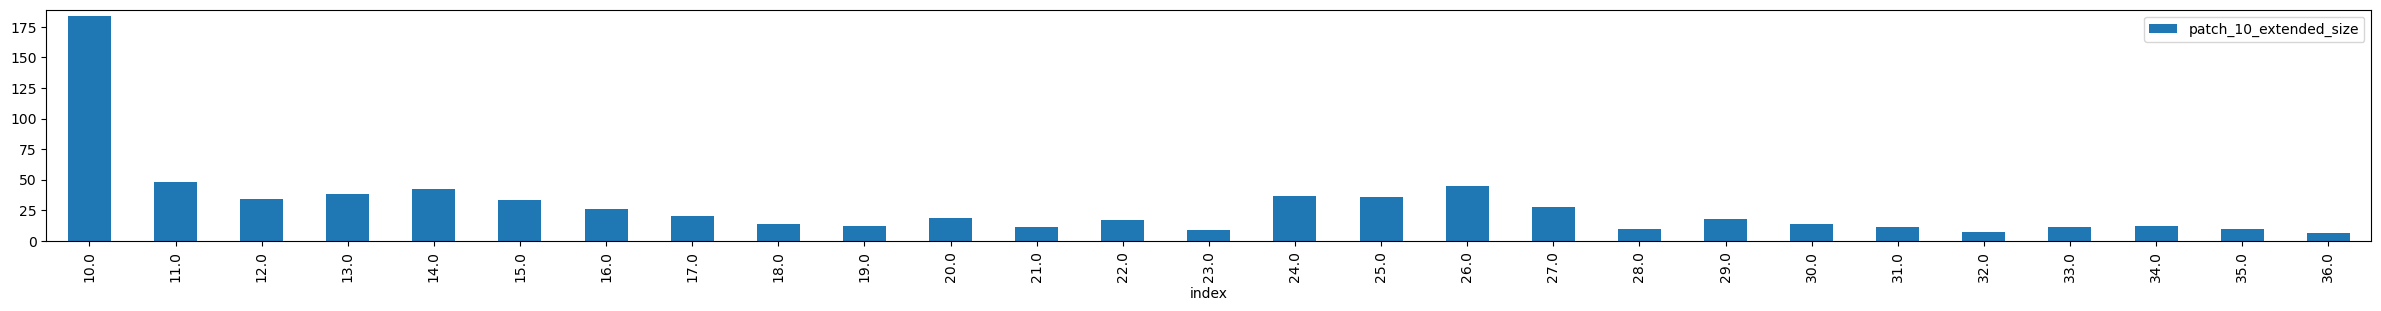

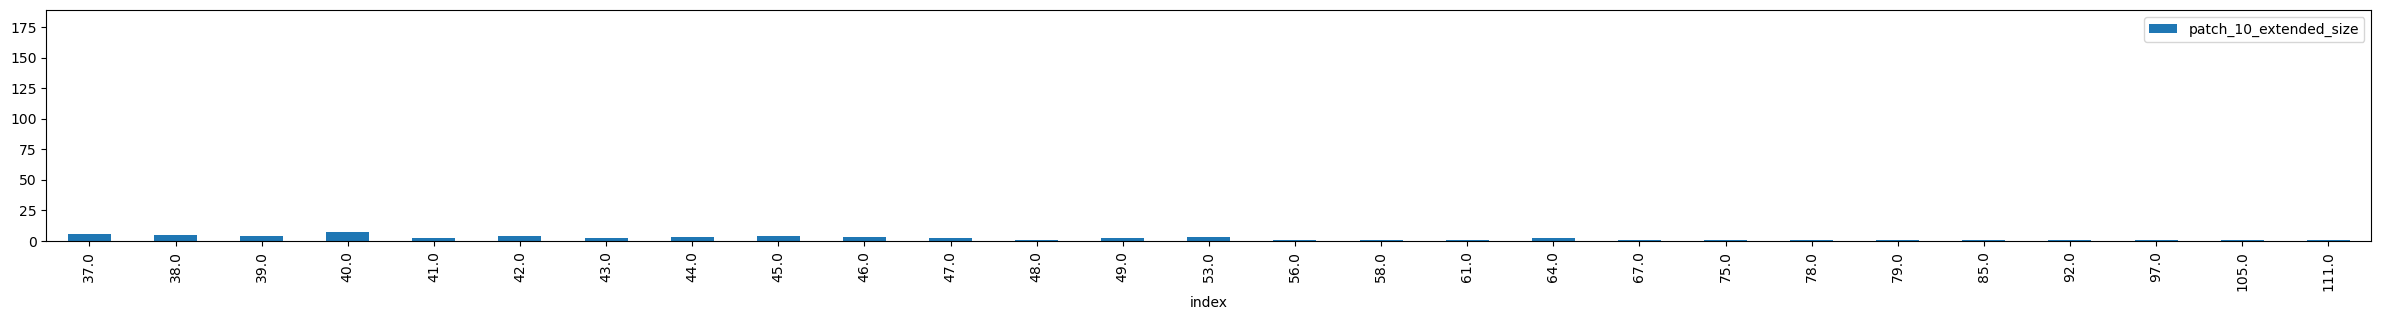

In [28]:
# for patch_size in PATCH_SIZES: 
#     plot_column_value_count_distribution(scores_df, f'patch_{patch_size}_extended_size')
plot_column_value_count_distribution(scores_df, 'patch_10_extended_size')

In [29]:
def plot_preds(preds_list):
    positions = [_ for _ in range(len(preds_list))]
    plt.rcParams['figure.figsize'] = (5, 3)
    plt.plot(positions, preds_list)
    plt.ylim([-0.05, 1.02])
    plt.show()

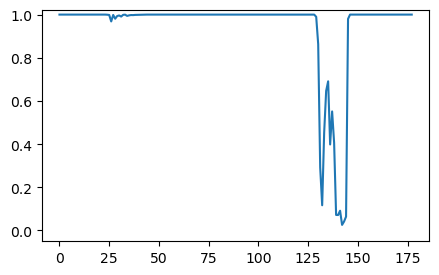

In [30]:
plot_preds(scores_df.iloc[5]['patch_10_preds'])

Bar charts:

                                                                                           PATCH SIZE = 10


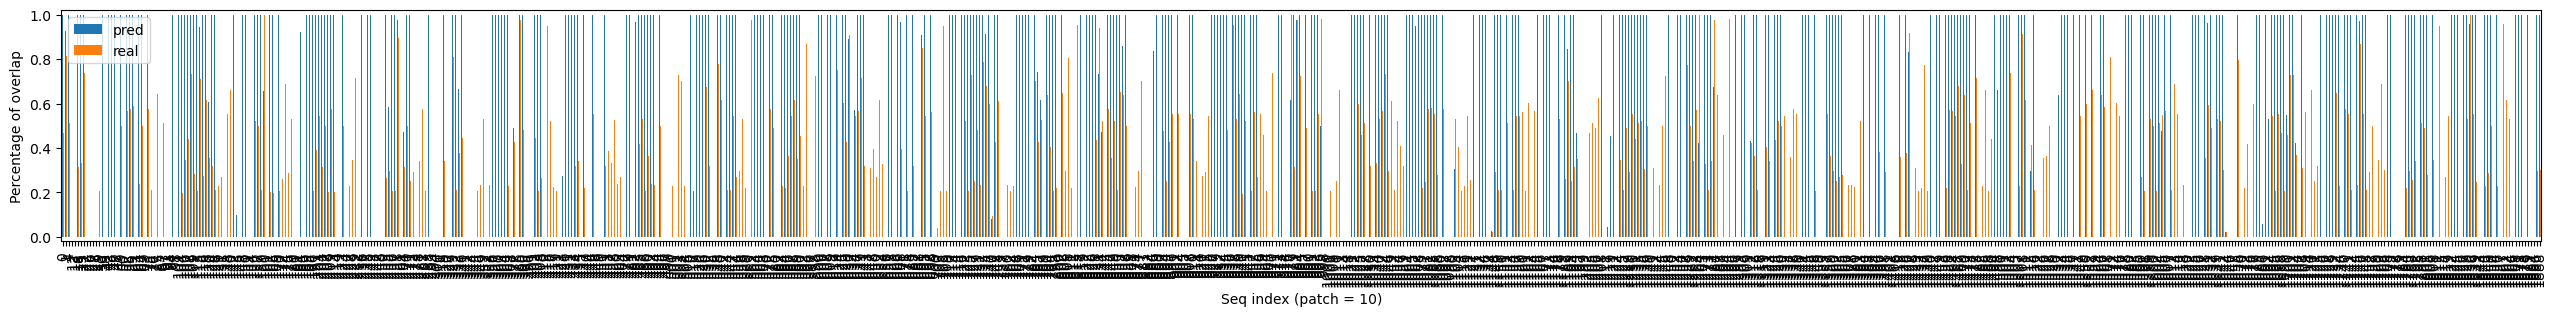

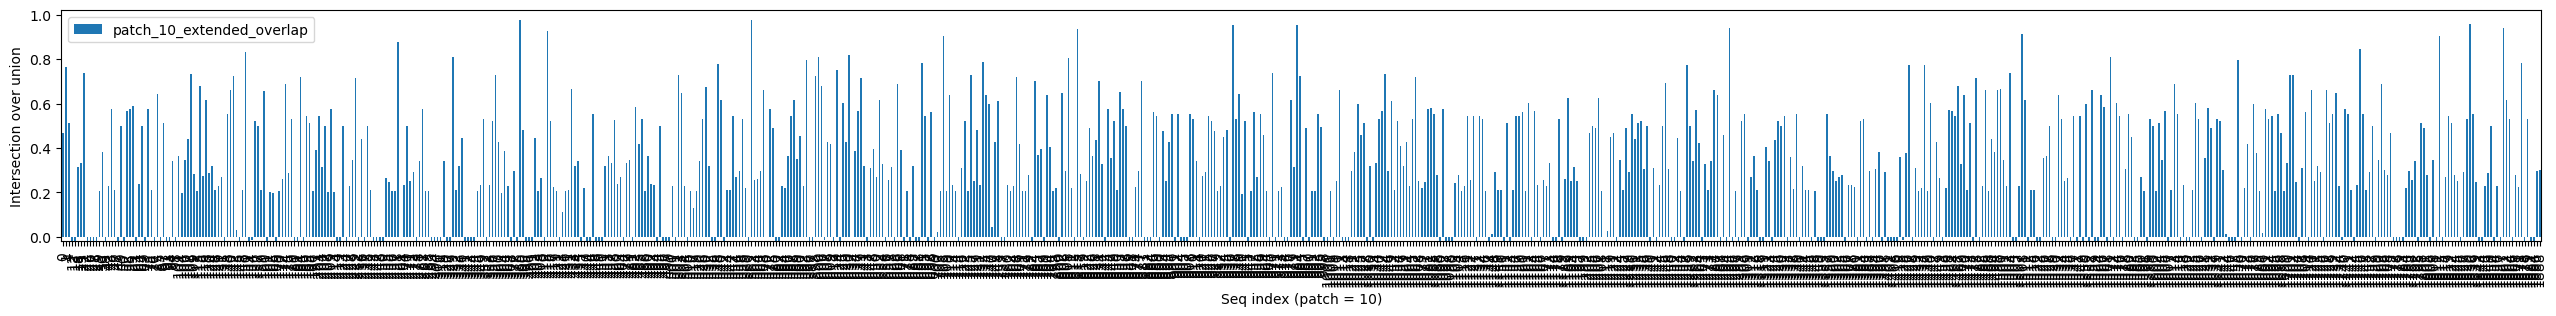

                                                                                           PATCH SIZE = 50


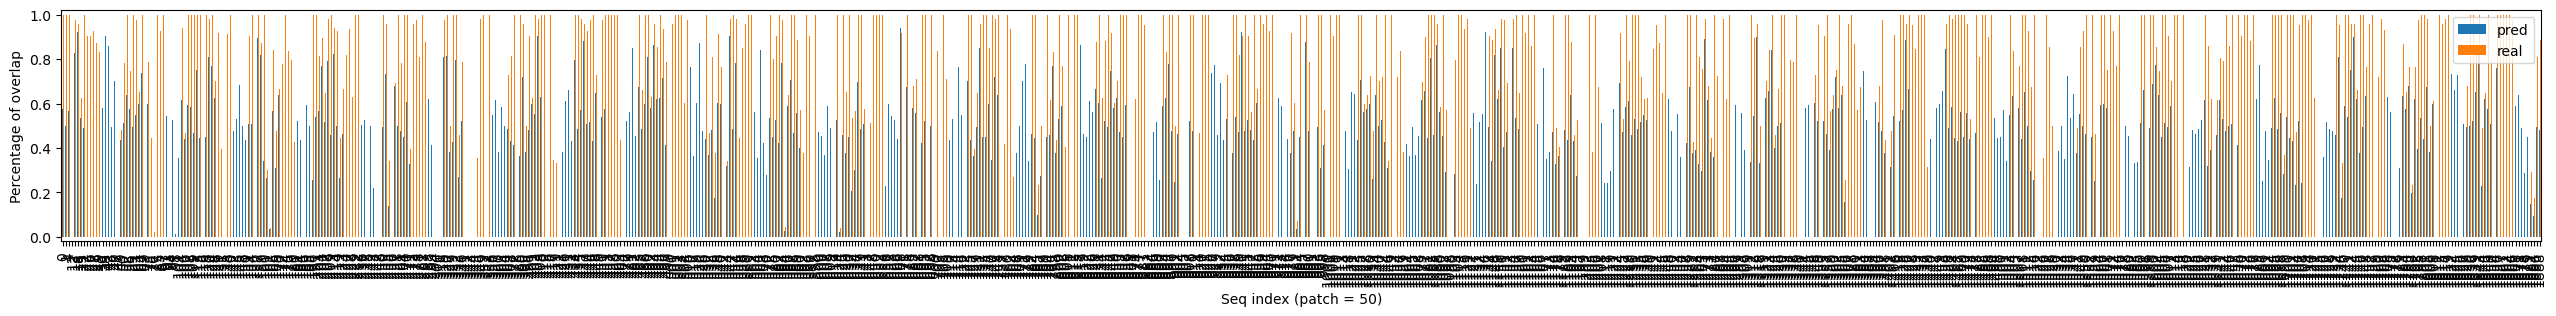

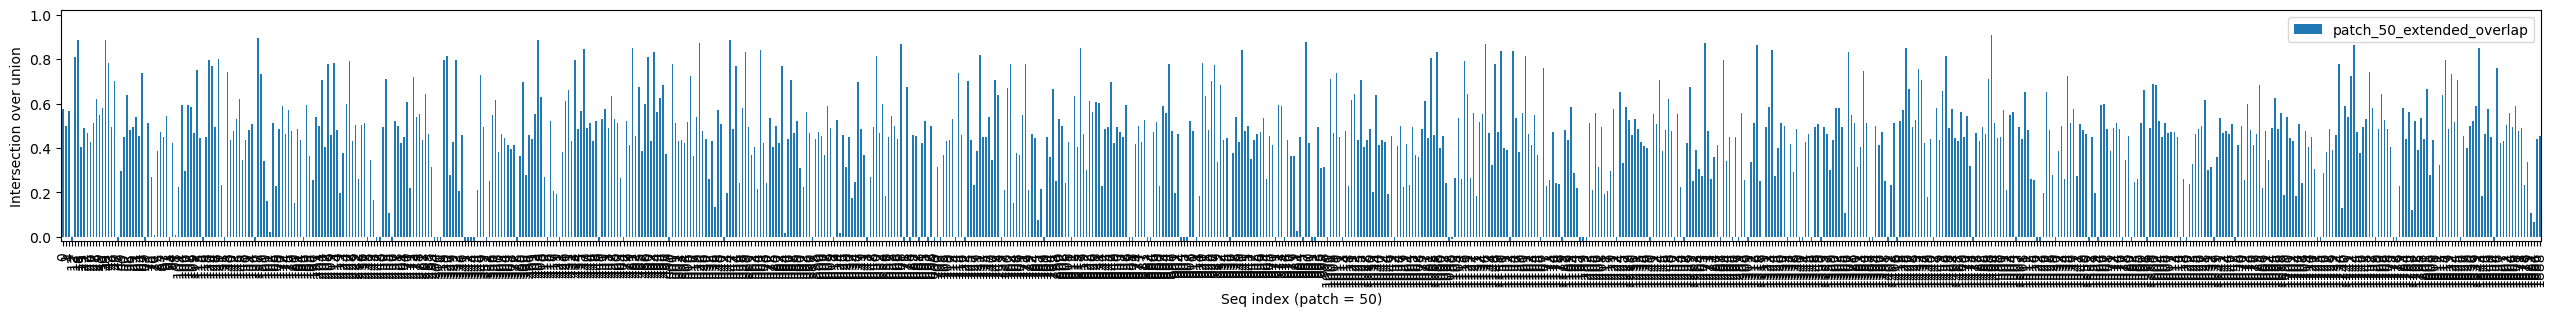

                                                                                           PATCH SIZE = 80


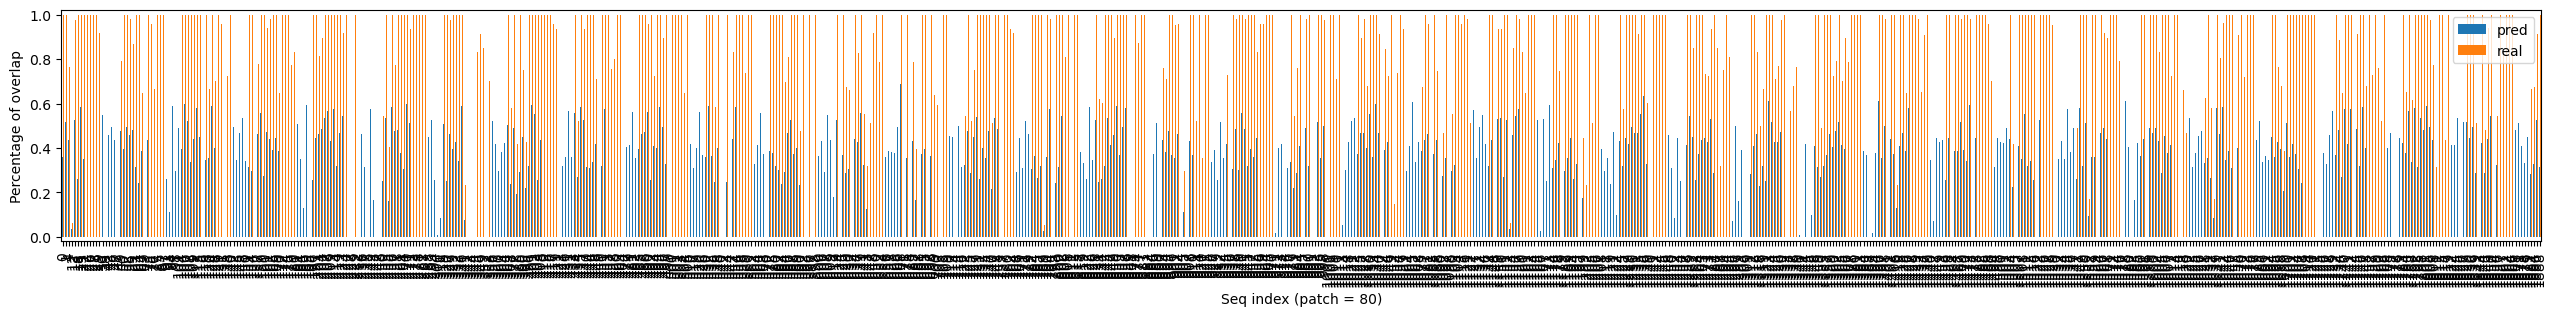

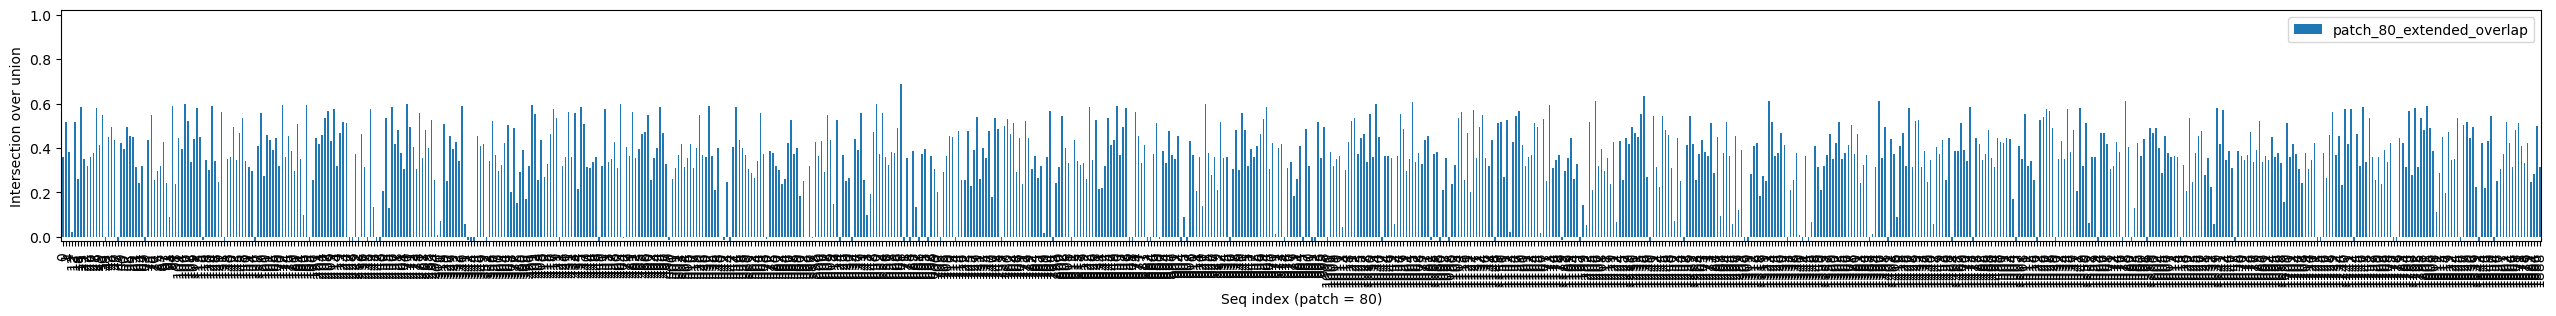

                                                                                           PATCH SIZE = 200


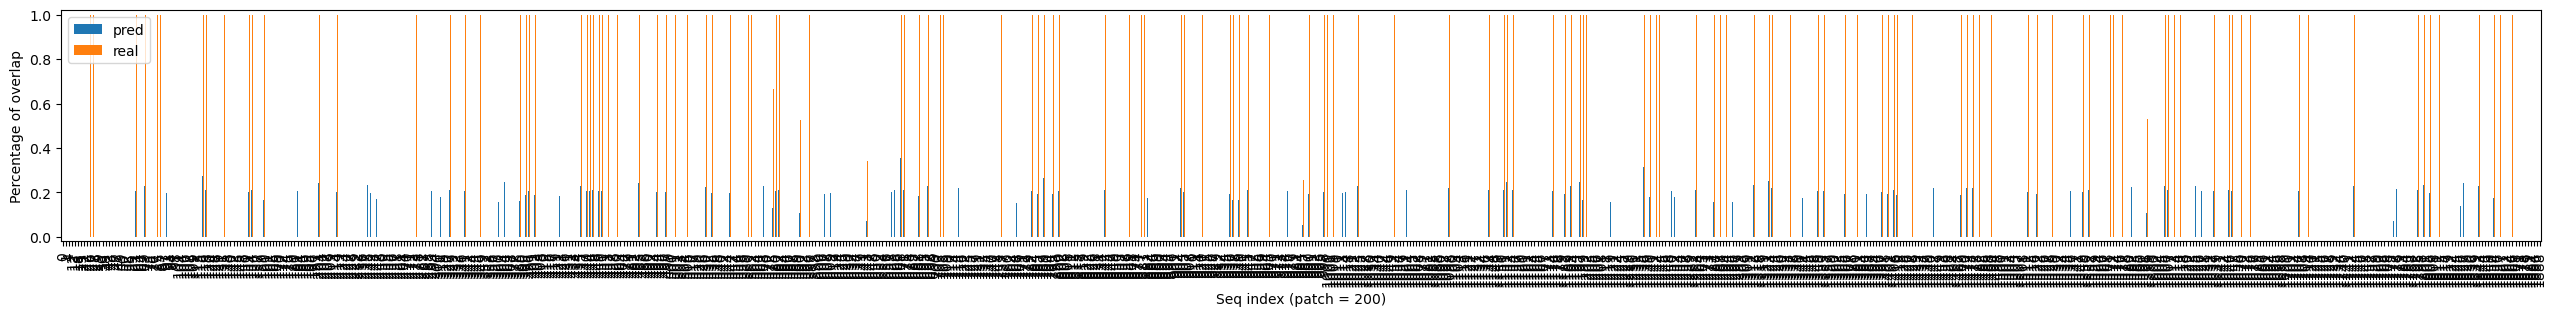

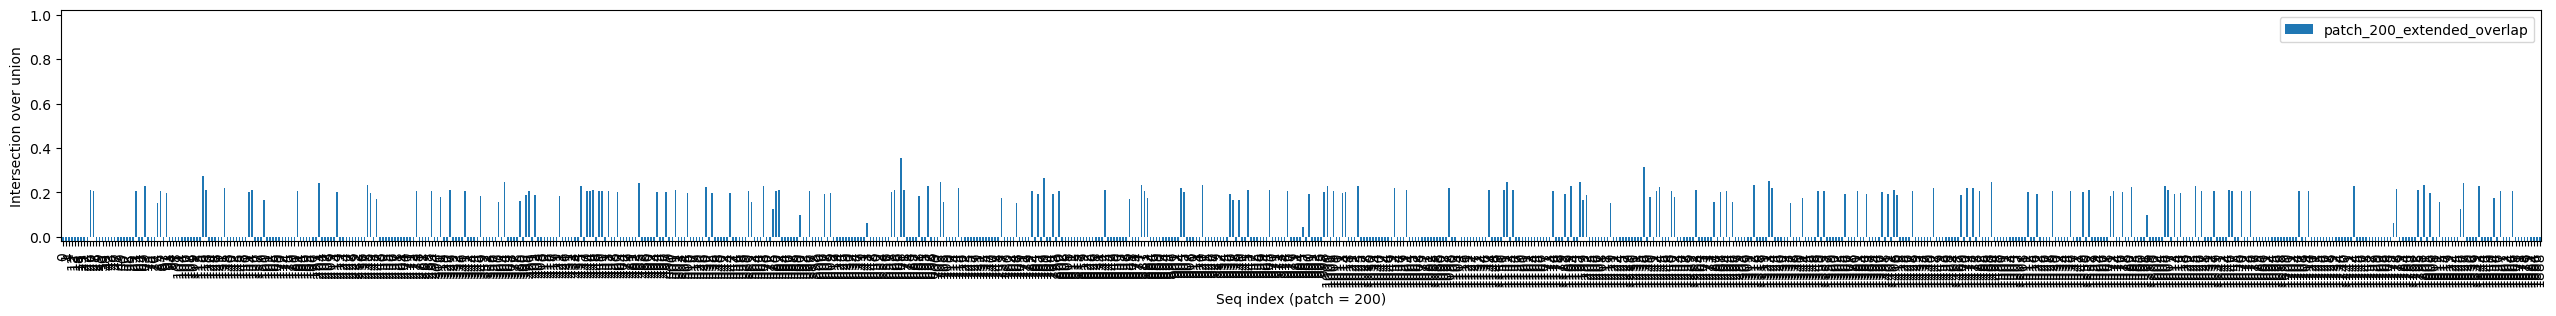

In [31]:
def plot_overlap_scores(patches, df):
    patches_len = len(patches)
    plt.rcParams['figure.figsize'] = (8 * patches_len, 3)

    for i in range(patches_len):
        patch_size = patches[i]
        print(' ' * 90 + f' PATCH SIZE = {patch_size}')

        ax = df.plot(x='index', y=[f'patch_{patch_size}_min_extended_overlap_pred', f'patch_{patch_size}_min_extended_overlap_real'], kind='bar', ylim=(-0.02,1.02)) # ylim to force y-axis scale to be the same as it is for the other graphs
        ax.legend(['pred', 'real'])
        ax.set_xlabel(f'Seq index (patch = {patch_size})')
        ax.set_ylabel('Percentage of overlap')
        plt.show()
        
        ax = df.plot(x='index', y=[f'patch_{patch_size}_extended_overlap'], kind='bar', ylim=(-0.02,1.02))
        ax.set_xlabel(f'Seq index (patch = {patch_size})')
        ax.set_ylabel('Intersection over union')
        plt.show()

scores_df['index'] = scores_df.index
plot_overlap_scores(PATCH_SIZES, scores_df)

In [32]:
scores_df.drop(['index'], axis=1, inplace=True)
scores_df.to_csv(OUTPUT, index=False)